# Fake News Detection from articles
- ![](https://www.geo.tv/assets/uploads/updates/2018-07-18/l_203781_040549_updates.jpg)
- Some fake articles have relatively frequent use of
terms seemingly intended to inspire outrage and the
present writing skill in such articles is generally
considerably lesser than in standard news.

## Importing libraries

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/38.8 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.5/38.8 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.8 MB 6.4 MB/s eta 0:00:06
   - -------------------------------------- 1.6/38.8 MB 7.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.8 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.8 MB 8.9 MB/s eta 0:00:05
   --- ------------------------------------ 3.0/38.8 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.8 MB 9.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.8 MB 8.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.4/38.8 MB 9.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.8/38.8 MB 9.9 MB/s eta 0:00:04
   ---

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import requests
import bs4
from bs4 import BeautifulSoup
import ipywidgets as widgets
from IPython.display import display
#from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image,display
import os
fake = Image('https://techcrunch.com/wp-content/uploads/2017/09/fake-news.jpg')
real = Image('https://mcdn.coolmate.me/image/October2023/tin-chuan-chua-anh-meme-3089_702.jpg')

In [6]:
!pip install transformers
!pip install pytorch_pretrained_bert

In [8]:
import torch.nn as nn
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

## Model

## Description
- Used [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) with fine tuning
- BERT, which stands for Bidirectional Encoder Representations from Transformers.
- BERT is designed to pretrain deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial taskspecific architecture modifications.
- ![](https://github.com/manideep2510/siamese-BERT-fake-news-detection-LIAR/blob/master/doc_images/bert.png?raw=true)

#### Code

In [9]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

## Preprocessing
- Used [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) for scraping articles from the web, Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping
- Also used some custom made functions for removing punctuation etc.
-![](https://miro.medium.com/max/495/1*AaAIETIq7XNlLrFQW7BtZg.png)

### code

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [11]:
def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    # traverse the given string and if any punctuation 
    # marks occur replace it with null 
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    # return string without punctuation 
    return string

<>:4: SyntaxWarning: invalid escape sequence '\,'
<>:4: SyntaxWarning: invalid escape sequence '\,'
C:\Users\ND.Son\AppData\Local\Temp\ipykernel_13316\84403587.py:4: SyntaxWarning: invalid escape sequence '\,'
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


In [12]:
def get_text(url):
    try:
        result=requests.get(str(url))
    except Exception:
        print("error in scraping url")
        return None
    src=result.content
    soup=BeautifulSoup(src,'lxml')   
    text=[]	
    for p_tag in soup.find_all('p'):
        text.append(p_tag.text)
    text = Punctuation(str(text))
    return text

## Testing

In [ ]:
# drive_link = 'https://drive.google.com/open?id=108JY7_yROQQsJDFbusVPP1aUmkZ4xe16'

In [14]:
path='D:/Fake_News_Article/nb_state256.pth'
#weights_url = 'https://drive.google.com/open?id=1r-XIJBfW3EZT6rIqE5kQD96hJb4MoEj7'
model = BertBinaryClassifier()
# optimizer = torch.optim.Adam(model.parameters(), lr=3e-6)
model.load_state_dict(torch.load(path))
model.eval()

C:\Users\ND.Son\AppData\Local\Temp\ipykernel_13316\3301462054.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


BertBinaryClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
    

In [15]:
def test(article,model):
    bert_predicted = []
    all_logits = []
    test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:255], [article]))
    test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))
    test_tokens_ids = pad_sequences(test_tokens_ids, maxlen=256, truncating="post", padding="post", dtype="int")
    test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]
    test_masks_tensor = torch.tensor(test_masks)
    test_tokens_ids = torch.tensor(test_tokens_ids)
    with torch.no_grad():
        logits = model(test_tokens_ids, test_masks_tensor)
        numpy_logits = logits.cpu().detach().numpy()
        if(numpy_logits[0,0] > 0.5):
            return 'Fake'
        else:
            return 'True'

In [16]:
def answer(url,model):
    article = get_text(url)
    ans = test(article,model)
    return ans

## Inference

- Enter the url to test , Add press Shift+Enter for results.

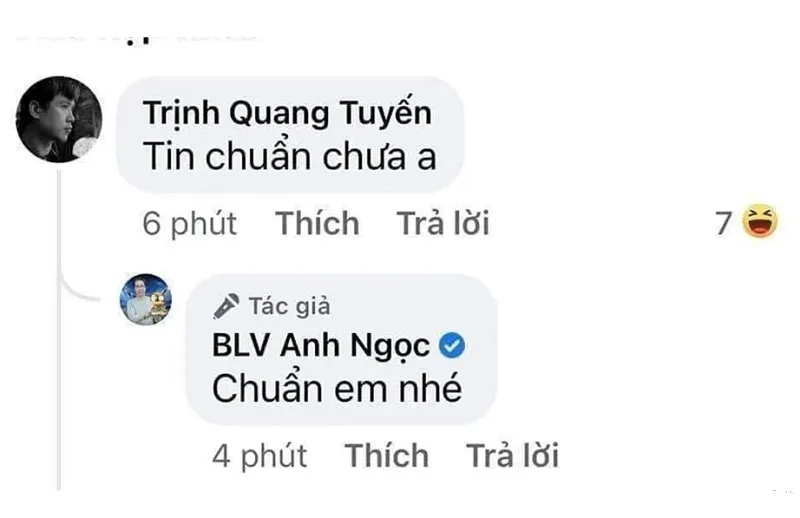

In [23]:
#@title Fake Article Detection

url = 'https://abcnews.go.com/Politics/appeals-court-mueller-properly-appointed-orders-stone-aide/story?id=61327058' #@param {type:"string"}
# button = widgets.Button(description="Enter")
# output = widgets.Output()
# display(button, output)
#print(answer(url,model))
if (answer(url,model)=='True'):
    display(real)
else:
    display(fake)